In [7]:
#Ehtiyacımız olan kitabxanaları import edirik
import numpy as np
from  sklearn.manifold import TSNE
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

In [12]:
#Korpusun hazırlanması.Qeyd edimki fəlsəfə.txt faylını internet üzərindən elektron kitab formasında yükləyib txt -mətn faylına çevirmişəm.
#söz,cümlələrin daha çox təşkil etdiyi bazanı təşkil etsəniz daha məqsədəuyğundur.
#Nümunə üçün ifadə sayı az olan data hazırladım
file=open('fəlsəfə.txt','r',encoding='utf-8')
text=file.read()
text_list=text.split('\n')
corpus=[] 
for sentence in text_list:
    corpus.append(sentence.split())
    



In [13]:
print(corpus[20:40])#Hazırladığımız korpus daxilində Siyahıları çap edək

[['Deyə', 'bilərik', 'ki,', 'fəlsəfə', 'mənəvi', 'təfəkkür', 'mədəniyyətinin', 'aynca'], ['bir', 'hissəsidir.', 'O,', 'fəlsəfəni', 'öyrənən', 'insanı', 'praktiki', 'həyat', 'proqra-'], ['mı,', 'həyatm', 'ali', 'mənasınm', 'dərk', 'edilməsi,', 'əxlaqi', 'ideallar', 'ilə'], ['silahlandırmağı', 'qarşısma', 'məqsəd', 'qoymuşdur.', 'İ.Kant', 'fəlsəfənin'], ['fəal', 'praktiki', 'xarakterini', 'vurğulayaraq', 'yazırdı:', '"Ümumiyyətlə,'], ['müdriklik', 'bilikdən', 'daha', 'çox', 'fəaliyyət', 'tərzindən', 'ibarətdir..."'], ['Fəlsəfə', 'mükəmməl', 'müdriklik', 'ideyasmı', 'təcəssüm', 'etdirir,', 'insan'], ['zəkasmm', 'ali', 'məqsədlərini', 'göstərir.', 'Filosofluğun', 'mahiyyəti', 'ali'], ['mənəvi', 'dəyərləri', 'əsaslandırmaqdır.'], ['Fəlsəfə', 'dünyanı', 'əvvəlcə', 'dərk', 'edən,', 'sonra', 'isə', 'onu', 'qiymətləndirən'], ['insanm', 'mənəvi', 'istiqamətləndirilməsi', 'funksiyasmı', 'yerinə', 'yetirir.'], ['Insanda', 'insaniyyətlik,', 'bütövlükdə', 'insanın', 'nə', 'demək', 'olduğu', 'fəl-'],

In [15]:
#modelin hazırlanması. 

model=Word2Vec(corpus,size=200,window=5,min_count=3,sg=1)

In [16]:
#hazırladığımız model daxilində əgər qeyd etdiyimiz ifadə varsa,həmin kəlimənin vektorunu ekrana çap edək
model.wv['insan']

array([-1.73220098e-01,  7.17285573e-02,  2.21848384e-01,  9.57690999e-02,
        1.50217623e-01, -2.05596417e-01,  1.90530002e-01, -5.89258857e-02,
        1.25140920e-01,  1.45731270e-01, -2.64263880e-02, -9.93723646e-02,
        1.05960995e-01,  1.62798151e-01,  1.70457289e-01, -1.94791958e-01,
       -3.72118205e-02,  1.02530955e-03, -7.04402998e-02, -5.16346209e-02,
        1.79711077e-02, -1.86107270e-02,  1.14059575e-01,  1.09026559e-01,
       -6.40766397e-02,  7.68856052e-03,  1.29410163e-01, -1.30589724e-01,
        5.74187636e-02, -1.18487678e-01,  5.66710420e-02,  2.42407709e-01,
        9.74488333e-02,  2.19071046e-01, -8.54149926e-03,  1.35992929e-01,
       -7.58354589e-02,  2.99768765e-02,  8.82374570e-02, -9.67346951e-02,
       -1.51456833e-01, -1.37611926e-01, -1.06683141e-02,  2.08836168e-01,
        1.24249607e-01,  3.53677683e-02,  2.42564887e-01, -1.30128274e-02,
        7.46742263e-03, -2.46523023e-02, -1.58558264e-02,  1.08905688e-01,
       -9.57299396e-02, -

In [17]:
#Nümunə-2
model.wv['fəlsəfə']

array([-0.15873952,  0.06984898,  0.2147544 ,  0.10002061,  0.1508033 ,
       -0.20804113,  0.19849917, -0.05528036,  0.11932387,  0.14295459,
       -0.02363978, -0.08652123,  0.10179909,  0.15469973,  0.16792923,
       -0.18837185, -0.03809875, -0.00144803, -0.07591679, -0.04480186,
        0.01930694, -0.03166017,  0.11058316,  0.11143503, -0.06969286,
        0.01179114,  0.1251409 , -0.12471502,  0.05396511, -0.11485382,
        0.05899879,  0.23600306,  0.09655861,  0.19878761, -0.00169392,
        0.13392656, -0.07984007,  0.02669944,  0.08189487, -0.07647669,
       -0.15079819, -0.13525191, -0.00626568,  0.18908858,  0.11855128,
        0.03927552,  0.2360883 , -0.0263707 ,  0.00555322, -0.01807825,
       -0.01600507,  0.10171638, -0.08216535, -0.02008793, -0.1345765 ,
       -0.12499556,  0.00169457, -0.06123933,  0.03457909, -0.07550904,
       -0.1294967 , -0.01580364,  0.21133521,  0.23497932,  0.05896725,
        0.2358352 , -0.06195494,  0.23737688,  0.07684441, -0.26

In [18]:
#Birbirinə bənzər-yaxınlıq elementləri üçün ifadəni test edək
model.wv.most_similar('edir')

[('O,', 0.9986732006072998),
 ('edirdi', 0.9986534118652344),
 ('insan', 0.9979372024536133),
 ('o,', 0.9978002309799194),
 ('həmin', 0.9975552558898926),
 ('insanın', 0.9971436858177185),
 ('hər', 0.9970661401748657),
 ('bütün', 0.9969725608825684),
 ('edir.', 0.996910572052002),
 ('isə', 0.9968838691711426)]

In [19]:
#Hazırladığımız modeli data qovluğunda yaddaşda saxlayaq.
model.save('data/word2vec.model')

Ifadəni yazın:fəlsəfə


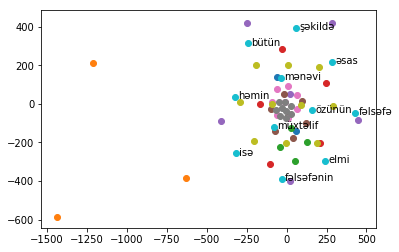

In [47]:

words=input("Ifadəni yazın:")
def _TSNE(model,words):
    word_vec=np.empty((0,200))
    word_label=[words]
    similar_words=model.wv.most_similar(words)
    word_vec=np.append(word_vec,np.array([model.wv[words]]),axis=0)
    model=Word2Vec.load('data/word2vec.model')
    for w,v in similar_words:
        word_label.append(w)
        word_vec=np.append(word_vec,np.array([model.wv[w]]),axis=0)
        _tsne=TSNE(random_state=0)
        y_tsne=_tsne.fit_transform(word_vec)
        x_coordinate=y_tsne[:,0]
        y_coordinate=y_tsne[:,1]
        plt.scatter(x_coordinate,y_coordinate)
    for label,x,y in zip(word_label,x_coordinate,y_coordinate):
        plt.annotate(label,xy=(x,y),xytext=(3,-2),textcoords='offset points')

    plt.show()
_TSNE(model,words)

In [48]:
#Mavi ilə qeyd olunmuş elementlər daxil etdiyimiz kəliməyə yaxınlıq prinspi ilə koordinat daxilində qeyd olunmuşdur

In [49]:
#Fəlsəfə kəliməsinə yaxınlıq gələn ifadələr yaxınlıq-prinsipinə əsaslanaraq sıralanmışdır
model.wv.most_similar('fəlsəfə')

[('özünün', 0.9995154142379761),
 ('mənəvi', 0.9993885159492493),
 ('müxtəlif', 0.9993727207183838),
 ('bütün', 0.9993531703948975),
 ('elmi', 0.9992967844009399),
 ('əsas', 0.9991745948791504),
 ('şəkildə', 0.9991042613983154),
 ('fəlsəfənin', 0.9990098476409912),
 ('isə', 0.9990068674087524),
 ('həmin', 0.9989999532699585)]